# ✈️ Aviation Accident Data Analysis  

In this project, we will analyze aviation accident data to identify trends and key insights. The process will involve:  

1. **Data Cleaning** – Handling missing values, removing unnecessary columns, and ensuring consistency in the dataset.  

2. **Data Exploration & Visualization** – Creating meaningful visualizations to understand accident trends, high-risk factors, and other crucial insights.  

3. **Saving Processed Data** – After cleaning and analysis, we will save the refined dataset as a CSV file for visualizing use at tableau.  

This analysis aims to provide a comprehensive understanding of aviation safety through data-driven insights. 📊✈️  


## First, load and examine the dataset.

##### Here I  will import the required Python libraries for data analysis and visualization in this stage.

##### To comprehend the structure of the aircraft accident dataset, load it into a Pandas DataFrame and view the first few rows.

##### Prior to cleaning and analysis, the objective is to obtain a general understanding of the dataset.


In [361]:
# Import necessary libraries
import pandas as pd  # Data manipulation
import numpy as np  # Numerical operations
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Statistical data visualization




In [362]:
# Load the dataset
aviation_data = pd.read_csv("AviationData.csv",encoding='latin1',low_memory=False)  
usstate_data = pd.read_csv("USState_Codes.csv",encoding='latin1') 



##### .head(),shows the first few rows of each dataset.
 one can detect column names, data types, and any problems like missing values with the help of this.
 ##### -We possess two datasets:

 ##### -AviationData.csv: This file contains reports of aircraft accidents.

 ##### -State abbreviations are mapped to full state names in USState_Codes.csv.

In [363]:
# Display the first few rows
aviation_data.head(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,Personal,NaN,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982


In [364]:

usstate_data.head(10)

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
5,Colorado,CO
6,Connecticut,CT
7,Delaware,DE
8,Florida,FL
9,Georgia,GA


In [365]:
# Check the number of rows and columns
print("Aviation Data Shape:", aviation_data.shape)
print("US State Data Shape:", usstate_data.shape)



Aviation Data Shape: (88889, 31)
US State Data Shape: (62, 2)


 The results above shows that the aviation data has 88889 number of rows and 31 number of columns.
 same to the state data , 62 rows and 2 columns

In [366]:
# Display column names
print("Aviation Data Columns:")
aviation_data.columns

Aviation Data Columns:


Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [367]:
print("US State Data Columns:")
print(usstate_data.columns)

US State Data Columns:
Index(['US_State', 'Abbreviation'], dtype='object')


The `.describe()` function in Pandas provides a statistical summary of numerical columns in a DataFrame. It helps in understanding the distribution and key statistics of the data.  

##### 🔍 What `.describe()` Shows:  
- **Count** – The number of non-null values in each column.  
- **Mean** – The average value of the column.  
- **Standard Deviation (std)** – How much the values deviate from the mean.  
- **Min & Max** – The smallest and largest values in the column.  
- **Percentiles (25%, 50%, 75%)** – These indicate the distribution of data (also known as quartiles).  


In [368]:

aviation_data.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


### An summary of each dataset is obtained by running.info(), and it includes:

 ##### The total number of entries (rows) in the dataset.
 ##### Columns (Features): Shows the available attributes in the dataset.
 ##### Data Types:This indicates whether a column is object (string), float64, int64, etc.
 ##### Non-Null Counts: Assists in locating any missing values in every column.In this case we have some columns that have missing values
 ##### Memory Usage: Shows how much memory is used by the dataset.


In [369]:
# Get summary info (data types, missing values, etc.)
print("Aviation Data Info:")
aviation_data.info()

print("\nUS State Data Info:")
usstate_data.info()

Aviation Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make              

In [370]:
# here we are looking for any duplicates in our dataset
aviation_data.duplicated().value_counts()
#usstate_data.duplicated().value_counts()

False    88889
dtype: int64

In [371]:
usstate_data.duplicated().value_counts()

False    62
dtype: int64

##### In both cases we the output is False,  meaning that both datasets have no duplicates which is good.

In [372]:
# this displays the total missing values of the data in descending order
aviation_data.isna().sum().sort_values(ascending=False)

Schedule                  76307
Air.carrier               72241
FAR.Description           56866
Aircraft.Category         56602
Longitude                 54516
Latitude                  54507
Airport.Code              38640
Airport.Name              36099
Broad.phase.of.flight     27165
Publication.Date          13771
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Fatal.Injuries      11401
Engine.Type                7077
Report.Status              6381
Purpose.of.flight          6192
Number.of.Engines          6084
Total.Uninjured            5912
Weather.Condition          4492
Aircraft.damage            3194
Registration.Number        1317
Injury.Severity            1000
Country                     226
Amateur.Built               102
Model                        92
Make                         63
Location                     52
Event.Date                    0
Accident.Number               0
Investigation.Type            0
Event.Id                      0
dtype: i

#### The above ouput displays that our data has plenty of missing values. in this case its good to find the percentage of the missing values and decide if we should drop the missing values, replace with(mean,min or max)

In [373]:
# here we count missing values in each column
missing_values = aviation_data.isnull().sum()

# Then filter and display only columns with missing values
missing_values = missing_values[missing_values > 0]

# Get the percentage of missing values
missing_percentage = (missing_values / len(aviation_data)) * 100
print("\nPercentage of Missing Values:")
print(missing_percentage.sort_values(ascending=False))



Percentage of Missing Values:
Schedule                  85.845268
Air.carrier               81.271023
FAR.Description           63.974170
Aircraft.Category         63.677170
Longitude                 61.330423
Latitude                  61.320298
Airport.Code              43.469946
Airport.Name              40.611324
Broad.phase.of.flight     30.560587
Publication.Date          15.492356
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Fatal.Injuries      12.826109
Engine.Type                7.961615
Report.Status              7.178616
Purpose.of.flight          6.965991
Number.of.Engines          6.844491
Total.Uninjured            6.650992
Weather.Condition          5.053494
Aircraft.damage            3.593246
Registration.Number        1.481623
Injury.Severity            1.124999
Country                    0.254250
Amateur.Built              0.114750
Model                      0.103500
Make                       0.070875
Location                   0.0585

##### Now that we know the percentage of missing values, we are going to create a copy of the aviation data and use that to solve the problem so as not to alter with the original data.

In [374]:
# Create a copy of the original data, in this case its called 'aviation_clean'.
aviation_clean=aviation_data.copy(deep=True)
aviation_clean.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


##### Bellow we are dropping the columns with 45% or more of missing data
##### The ones with 44% and below we are going to replace the , categorical columns with 'Unknown' and the numerical columns with the 'median'

In [375]:
# Set limit to drop columns with more than 45% missing values
limit = 0.45  
missing_ratio = aviation_clean.isnull().sum() / len(aviation_clean)

# Identify columns to drop
columns_to_drop = missing_ratio[missing_ratio > limit].index

# Drop those columns
aviation_clean.drop(columns=columns_to_drop, axis=1, inplace=True)

#print the column names that have been dropped
print(f"Dropped columns: {list(columns_to_drop)}")


Dropped columns: ['Latitude', 'Longitude', 'Aircraft.Category', 'FAR.Description', 'Schedule', 'Air.carrier']


In [376]:
# This is to confirm if the columns have been dropped, and check on the remaining missing values.
aviation_clean.isnull().sum().sort_values(ascending=False)

Airport.Code              38640
Airport.Name              36099
Broad.phase.of.flight     27165
Publication.Date          13771
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Fatal.Injuries      11401
Engine.Type                7077
Report.Status              6381
Purpose.of.flight          6192
Number.of.Engines          6084
Total.Uninjured            5912
Weather.Condition          4492
Aircraft.damage            3194
Registration.Number        1317
Injury.Severity            1000
Country                     226
Amateur.Built               102
Model                        92
Make                         63
Location                     52
Event.Date                    0
Accident.Number               0
Investigation.Type            0
Event.Id                      0
dtype: int64

In [377]:
# Here we are dfining the categorical data types so that we can replace the missing values with 'unknown'.
categorical_data = [
    "Airport.Code", "Airport.Name", "Broad.phase.of.flight", "Report.Status",
    "Purpose.of.flight", "Weather.Condition", "Aircraft.damage",
    "Registration.Number", "Injury.Severity", "Country", "Engine.Type",
    "Amateur.Built", "Model", "Make", "Location"
]




In [378]:
# Here we are defining the numerical data so that we can replac them with the 'median'.
numerical_data = [
    "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Fatal.Injuries",
    "Number.of.Engines", "Total.Uninjured"
]




In [379]:
# Now we Fill categorical columns with "Unknown"
aviation_clean.loc[:, categorical_data] = aviation_clean.loc[:, categorical_data].fillna("Unknown")

# Here we Fill numerical columns with median values
aviation_clean.loc[:, numerical_data] = aviation_clean.loc[:, numerical_data].fillna(aviation_clean[numerical_data].median())

# Here we Fill date column with mode (most frequent date)
if "Publication.Date" in aviation_clean.columns:
    aviation_clean.loc[:, "Publication.Date"] = aviation_clean["Publication.Date"].fillna(aviation_clean["Publication.Date"].mode()[0])


In [380]:
# Here we can see that all the columns are filled and we have no missing value
aviation_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88889 non-null  object 
 5   Country                 88889 non-null  object 
 6   Airport.Code            88889 non-null  object 
 7   Airport.Name            88889 non-null  object 
 8   Injury.Severity         88889 non-null  object 
 9   Aircraft.damage         88889 non-null  object 
 10  Registration.Number     88889 non-null  object 
 11  Make                    88889 non-null  object 
 12  Model                   88889 non-null  object 
 13  Amateur.Built           88889 non-null  object 
 14  Number.of.Engines       88889 non-null

##### We can see from the below shape our columns have reduced due to the dropped columns and we no longer have missing values which is good so far.
##### Our cuurent shape is 25 columns and 88,889 rows

In [381]:
# This shows the number of missing values after cleaning and now it has non
aviation_clean.isnull().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Airport.Code              0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
dtype: int64

In [382]:
# This now shows the new number of columns and rows after dropping 
aviation_clean.shape

(88889, 25)

##### here we are converting the Event.Date column to Year which will be a new column .This will help with visualizaion since its difficult to do with Event.Date.

In [383]:
# Convert Event.Date to datetime format
aviation_clean["Event.Date"] = pd.to_datetime(aviation_clean["Event.Date"])

# Extract the year
aviation_clean["Year"] = aviation_clean["Event.Date"].dt.year


In [384]:
# We are confirming if the column year has been added
aviation_clean.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Airport.Code', 'Airport.Name',
       'Injury.Severity', 'Aircraft.damage', 'Registration.Number', 'Make',
       'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date', 'Year'],
      dtype='object')

## GroupBy Analysis in Aviation Data

To extract meaningful insights from the aviation accident dataset, we use the `groupby` function to aggregate data based on various categories. Below are key groupby operations used in this analysis:

1. **Accidents Per Year** – Counts the number of accidents for each year to analyze trends over time.
2. **Fatal Injuries by Country** – Sums up total fatal injuries per country to identify high-risk regions.
3. **Accidents by Aircraft Make** – Groups accidents by manufacturer to assess which brands are most involved.
4. **Accidents by Weather Condition** – Categorizes accidents by weather type to understand environmental impact.
5. **Accidents by Phase of Flight** – Determines which phase (e.g., takeoff, landing) has the most accidents.

These insights help in understanding aviation risks and improving safety measures.


In [385]:
accidents_by_weather = aviation_clean.groupby("Weather.Condition")["Event.Id"].count()
print(accidents_by_weather)


Weather.Condition
IMC         5976
UNK          856
Unk          262
Unknown     4492
VMC        77303
Name: Event.Id, dtype: int64


In [386]:
# Here it determines the riskiest phase of flight.
accidents_by_phase = aviation_clean.groupby("Broad.phase.of.flight")["Event.Id"].count()
print(accidents_by_phase)


Broad.phase.of.flight
Approach        6546
Climb           2034
Cruise         10269
Descent         1887
Go-around       1353
Landing        15428
Maneuvering     8144
Other            119
Standing         945
Takeoff        12493
Taxi            1958
Unknown        27713
Name: Event.Id, dtype: int64


In [387]:
#  This shows the number of accidents per year.
accidents_per_year = aviation_clean.groupby("Year")["Event.Id"].count()
print(accidents_per_year)


Year
1948       1
1962       1
1974       1
1977       1
1979       2
1981       1
1982    3593
1983    3556
1984    3457
1985    3096
1986    2880
1987    2828
1988    2730
1989    2544
1990    2518
1991    2462
1992    2355
1993    2313
1994    2257
1995    2309
1996    2187
1997    2148
1998    2226
1999    2209
2000    2220
2001    2063
2002    2020
2003    2085
2004    1952
2005    2031
2006    1851
2007    2016
2008    1893
2009    1783
2010    1786
2011    1850
2012    1835
2013    1561
2014    1535
2015    1582
2016    1664
2017    1638
2018    1681
2019    1624
2020    1392
2021    1545
2022    1607
Name: Event.Id, dtype: int64


In [388]:
# This Identifies countries with the most fatal injuries.
fatal_injuries_by_country = aviation_clean.groupby("Country")["Total.Fatal.Injuries"].sum()
print(fatal_injuries_by_country)


Country
ATLANTIC OCEAN    267.0
AY                  0.0
Afghanistan       128.0
Albania             0.0
Algeria           107.0
                  ...  
West Indies         4.0
Wolseley            1.0
Yemen               0.0
Zambia             11.0
Zimbabwe            6.0
Name: Total.Fatal.Injuries, Length: 219, dtype: float64


In [389]:
# Helps find which aircraft manufacturers have the most accidents.
accidents_by_make = aviation_clean.groupby("Make")["Event.Id"].count()
print(accidents_by_make)


Make
107.5 Flying Corporation    1
1200                        1
177MF LLC                   1
1977 Colfer-chan            1
1st Ftr Gp                  1
                           ..
Zukowski                    1
Zwart                       1
de Havilland                9
drone                       1
unknown                     1
Name: Event.Id, Length: 8237, dtype: int64


In [390]:
aviation_clean.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Airport.Code', 'Airport.Name',
       'Injury.Severity', 'Aircraft.damage', 'Registration.Number', 'Make',
       'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date', 'Year'],
      dtype='object')

In [391]:
aviation_clean["Country_Accident_Count"] = aviation_clean.groupby("Country")["Country"].transform("count")
aviation_clean["Make_Accident_Count"] = aviation_clean.groupby("Make")["Make"].transform("count")


In [392]:
aviation_clean.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Airport.Code', 'Airport.Name',
       'Injury.Severity', 'Aircraft.damage', 'Registration.Number', 'Make',
       'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date', 'Year',
       'Country_Accident_Count', 'Make_Accident_Count'],
      dtype='object')

In [393]:
aviation_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      88889 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88889 non-null  object        
 5   Country                 88889 non-null  object        
 6   Airport.Code            88889 non-null  object        
 7   Airport.Name            88889 non-null  object        
 8   Injury.Severity         88889 non-null  object        
 9   Aircraft.damage         88889 non-null  object        
 10  Registration.Number     88889 non-null  object        
 11  Make                    88889 non-null  object        
 12  Model                   88889 non-null  object

In [394]:
print(aviation_clean.head())

         Event.Id Investigation.Type Accident.Number Event.Date  \
0  20001218X45444           Accident      SEA87LA080 1948-10-24   
1  20001218X45447           Accident      LAX94LA336 1962-07-19   
2  20061025X01555           Accident      NYC07LA005 1974-08-30   
3  20001218X45448           Accident      LAX96LA321 1977-06-19   
4  20041105X01764           Accident      CHI79FA064 1979-08-02   

          Location        Country Airport.Code Airport.Name Injury.Severity  \
0  MOOSE CREEK, ID  United States      Unknown      Unknown        Fatal(2)   
1   BRIDGEPORT, CA  United States      Unknown      Unknown        Fatal(4)   
2    Saltville, VA  United States      Unknown      Unknown        Fatal(3)   
3       EUREKA, CA  United States      Unknown      Unknown        Fatal(2)   
4       Canton, OH  United States      Unknown      Unknown        Fatal(1)   

  Aircraft.damage  ... Total.Serious.Injuries Total.Minor.Injuries  \
0       Destroyed  ...                    0.0       

📊 **VISUALIZATION**

##### Examining Aeronautical Accident Patterns and Hazards

 ##### By identifying risk variables, trends, and patterns, data visualization helps us gain important insights regarding aviation accidents.
 ##### It is easier to comprehend accident causes, high-risk flying periods, injury severities, and other important factors thanks to these visuals.

 ##### We can reduce operational risks for the business, optimize aircraft selection, and enhance aviation safety by evaluating this data and offering data-driven advice.


In the below code we are looking for;
 The number of aircraft accidents broken down per flying phase is depicted in this graphic.

 The several stages of flight, such as takeoff, cruising, and landing, are represented by the x-axis.

 The total number of accidents that happened throughout each phase is displayed on the y-axis.

 To make comparisons between various flight stages easier to understand, a bar chart is utilized.

 By identifying the most crucial flight phases where accidents are most likely to happen, this study can help improve aviation safety protocols and risk management.


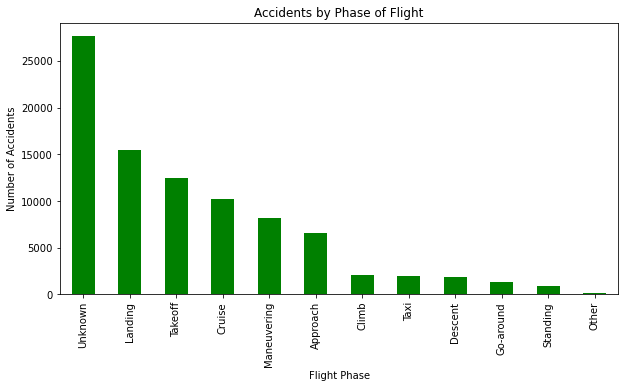

In [395]:
# Count accidents by flight phase
flight_phase_counts = aviation_clean["Broad.phase.of.flight"].value_counts()

# Plot
plt.figure(figsize=(10, 5))
flight_phase_counts.plot(kind="bar", color="g")
plt.xlabel("Flight Phase")
plt.ylabel("Number of Accidents")
plt.title("Accidents by Phase of Flight")
plt.show()


##### The Top 10 Aircraft Manufacturers in Accidents in a Line Plot
 The top ten aircraft manufacturers involved in accidents are shown in this line map.  We can see patterns and differences in the incidence of accidents across various manufacturers by employing a line plot rather than a bar chart.  Plotting the number of accidents on the y-axis, each point on the graph represents a manufacturer.  This makes it easier to compare manufacturers and determine which ones have experienced the most occurrences.


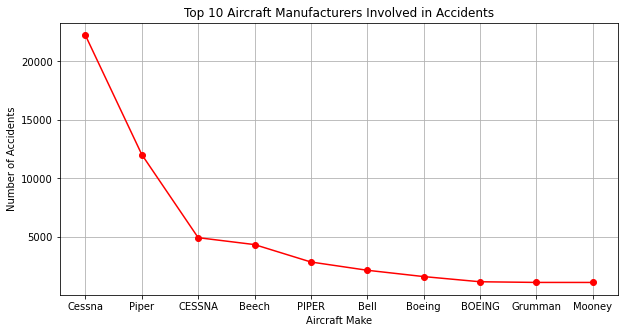

In [396]:
# Top 10 most common aircraft manufacturers in accidents
top_aircraft = aviation_clean["Make"].value_counts().head(10)

# Line plot
plt.figure(figsize=(10, 5))
plt.plot(top_aircraft.index, top_aircraft.values, marker="o", linestyle="-", color="r")
plt.xlabel("Aircraft Make")
plt.ylabel("Number of Accidents")
plt.title("Top 10 Aircraft Manufacturers Involved in Accidents")
plt.grid(True)  # Add grid for better visualization
plt.show()


##### Accidents in Aviation Over Time (Area Plot)
 This region plot illustrates how aviation accidents have changed throughout time.  The filled zone makes it simpler to see times of increase or drop by highlighting variations in accident frequency.  For particular years, the line's markers offer more clarification.  With the help of this graphic, we can examine trends over time and pinpoint possible causes of accident rates.


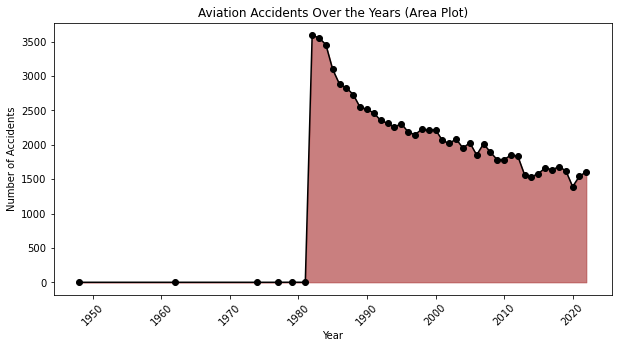

In [397]:
# Count number of accidents per year
accidents_per_year = aviation_clean["Year"].value_counts().sort_index()

# Area plot
plt.figure(figsize=(10, 5))
plt.fill_between(accidents_per_year.index, accidents_per_year.values, color="brown", alpha=0.6)
plt.plot(accidents_per_year.index, accidents_per_year.values, marker="o", linestyle="-", color="black")  # Adding line for clarity
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.title("Aviation Accidents Over the Years (Area Plot)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


 ✈️ **Top 10 Countries with the Most Fatal Injuries** 🏴‍☠️  

The horizontal bar chart above displays the top 10 countries with the highest number of fatal injuries in aviation accidents. The chart is sorted in descending order, with the country experiencing the most fatalities appearing at the top.  

#### Why a Horizontal Bar Chart?  
A horizontal bar chart is useful when dealing with categorical data, especially when country names are long. It improves readability and makes comparisons clearer.  

Additionally, the **y-axis is inverted** to emphasize ranking, ensuring the country with the highest fatalities is easily identifiable. This visualization helps highlight regions with the most severe aviation accidents for further analysis.


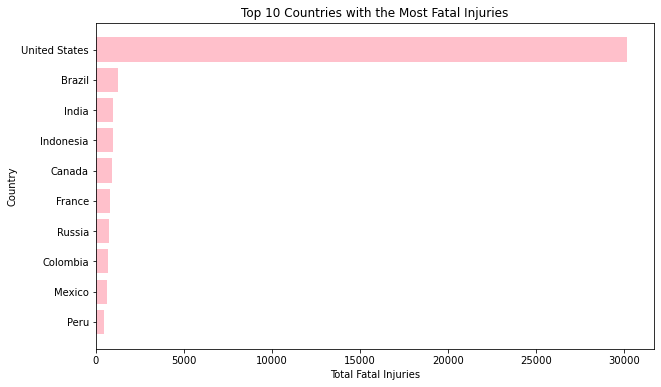

In [398]:
# Group by country and sum up total fatal injuries
fatal_injuries_by_country = aviation_clean.groupby("Country")["Total.Fatal.Injuries"].sum().sort_values(ascending=False).head(10)

# Horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(fatal_injuries_by_country.index, fatal_injuries_by_country.values, color='pink')
plt.xlabel("Total Fatal Injuries")
plt.ylabel("Country")
plt.title("Top 10 Countries with the Most Fatal Injuries")
plt.gca().invert_yaxis()  # Invert y-axis for better ranking display
plt.show()


In [399]:
# here we are saving the clan copy as a csv file
aviation_clean.to_csv("aviation_cleaned.csv", index=False)
